In [ ]:
import numpy as np 
import os
import re
import pandas as pd 
from   matplotlib import pyplot
from   collections import Counter
from   sklearn import model_selection

#Regular expression that can detect words and alphabets only 
RE = re.compile('[A-Za-z]+')
#file specific dictionary, fsd{ file:{word:frequency}}
fsd ={}
#Stop words
StopWords=["a", "about","doesn","writes","above","good", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
stop_words= {}
#stop words in a dictionary for faster search
for wrd in StopWords :
    stop_words[wrd] = True;
#dictionary with words and their frequencies in all files combined 
dictionary = {}
#array versioan of dictionary
dictArray= []
#home directory or the root folder of all news articles
homee= "C://Users//dkm//pySpace//PROJECTS//ml//Text_Classification//20newsgroups-mld//mini_newsgroups//mini_newsgroups"
#final data array shall contain the files and their catagories and full paths  
table =[]

In [ ]:
table = [["FullPath","file","Catagory"]]
for dirpath, dirs, files in os.walk(homee):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        table.append([fname,filename, dirpath.split('//')[-1]] )
table = np.array(table)
table = table[1:len(table)]

In [23]:
### Stopinator 
## first 15- 20 lines in every file  are meta tags they shall be removed  
#so all the words are addes to a string which then will be added to stop_word dictionary
#depricated (adding these words in stop_words would not only remove them from the meta section but from the article too, was a dumb decision to make  )
#wastedLines = ""
#for fname  in table[:,0]:
#    with open(fname) as myfile: 
#        for line in (myfile.read()).split('\n'):
#            if ':' not in line :
#                break
#            wastedLines += " "+line
## Wasted words 
#for word in (RE.findall(wastedLines)):
#    stop_words[word.lower()]=True
#Now we have more stop words 


In [ ]:
# In[469]:
#fname = full path , fName = filename 
#takes a file, extracts non-stop_words and records their frequencies to dictionary and fsd  
def process(fname, dictionary,stop_words):
        fName= (fname.split("\\"))[-1]
        #fName is filename fname is completepath
        fsd[fName] ={}
        with open(fname) as myfile: 
            for line in ( myfile.read() ).split('\n'):
                if ':' in  line:  #lines with meta info are skipped
                    continue
                for word in (RE.findall(line)):
                    if len(word)<2 or ( word.lower() in stop_words):
                        continue
                    if word in fsd[fName]:
                        fsd[fName][word] +=1
                    else:
                        fsd[fName][word] =1
                    if word in dictionary :
                        dictionary[word] +=1 
                    else:
                        dictionary[word] =1
        return


In [ ]:
# In[470]:
#dictonary phase
##build dictionary with { filename : frequency} structure and populate fsd {file:{word:frequency }}
x_train, x_test, y_train, y_test = model_selection.train_test_split(table[:,0:2], table[:,-1])
for i in x_train[:,0]:
    process(i,dictionary,stop_words)
flush={} # We dont need the words inside these files to get included in "dicio" 
for i in x_test[:,0]:
    process(i,flush,stop_words)
flush = None

##status/ debug info 
len(dictionary), len(stop_words), len( dictArray)

In [26]:
# In[471]:
###dictArray CREATION array version of the current dictionary 
dictArray = []
dictArray = [[i,j] for i,j in dictionary.items()]
dictArray = (sorted(dictArray,key=lambda x: (x[1]))) 
##status 
backupDictArray = dictArray
len(dictionary),len(stop_words),len( dictArray),len(table) 


(32823, 320, 32823, 2000)

In [27]:
##Terminator
##the code below eliminates the words common in all files by searching the word in every file one by one
dictArray.reverse()

file_count= len(fsd.keys())
for word,frequency in dictArray:
    if frequency < file_count: 
        break
    Is_this_word_in_every_file = True
    for file in fsd.keys():
        if word not in fsd[file]:
            Is_this_word_in_every_file = False
            print(word, "not in ", fname )
            break
    if Is_this_word_in_every_file : 
        [fsd[thisFile].pop(word) for thisFile in fsd.keys()] 
        dictionary.pop(word)
        
dictArray = []
dictArray = [[i,j] for i,j in dictionary.items()]
dictArray = (sorted(dictArray,key=lambda x: (x[1]))) 
##statusy

len(dictionary), len(stop_words), len( dictArray)


(32823, 320, 32823)

In [33]:
# restore full dict array
dictArray = backupDictArray

#upper bound for highest frequency permittable 
upperBound = 1000
lowerBound = 5

counter =0
for i,j in dictArray :
    counter+=1
    if j > lowerBound:
        break
        
dictArray = dictArray[counter-1 : len(dictionary )]
dictArray.reverse()
counter =0
for i,j in dictArray :
    counter+=1
    if j <upperBound:
        break
dictArray = dictArray[counter : len(dictionary)]


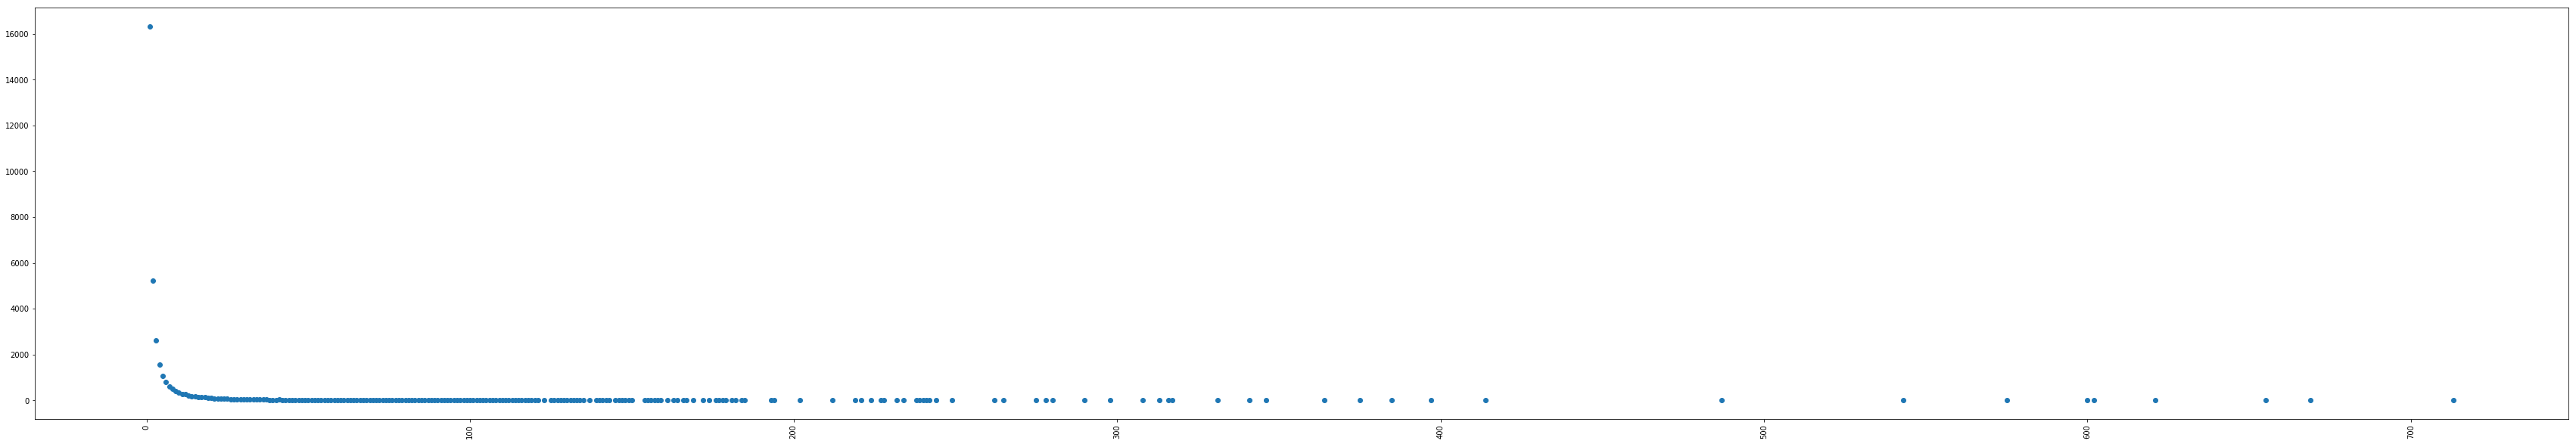

In [34]:

dictArray2 =np.array( [i for j,i in dictArray[0:len(dictArray)]] ,dtype= int)

import matplotlib.pyplot as plt
fig_size=[0,0]
fig_size[0] = 60
fig_size[1] =10

plt.rcParams["figure.figsize"] = fig_size
plt.xticks(rotation=90)

x = Counter(dictArray2).keys()
y = Counter(dictArray2).values()
plt.scatter(x,y)
plt.show()

#Frequency of frequencies 

#plt.scatter([i for i in range( len(dictArray) )],[j for i,j in dictArray])
#plt.show()


In [35]:
##Final Data table 
#count=0
#for dirpath, dirs, files in os.walk(homee):
#    for filename in files:
#        fname = os.path.join(dirpath,filename)
#        data  = np.append(data,[[filename, (dirpath.split("\\"))[-1]]],axis=0)
#data = data [1:len(data)] 
len(dictArray)

32822

In [36]:
#create the table file X word table saving frequency

filess = [[i for i in  range(len(table))]]
for word,freq in dictArray:
    word_freq_per_file =[]
    for file in table[:, 1]:
        if word in fsd[file]:
            word_freq_per_file.append(fsd[file][word])
        else:
            word_freq_per_file.append(0)
    filess.append(word_freq_per_file )


In [37]:
del fsd

In [38]:
filess = np.array(filess, dtype= 'int16')
print(filess.shape)
filess = np.transpose(filess)
filess.shape

(32823, 2000)


(2000, 32823)

In [39]:
#np.savetxt("testing.csv",filess, delimiter=",",fmt= "%1.0d")
df= pd.DataFrame(data = filess, columns=[i for i,j in  dictArray] ,dtype = 'int16' )
#df = pd.read_csv("C:\\Users\\dkm\\pySpace\\PROJECTS\\ml\\Text_Classification\\testing.csv" , dtype='int16')
df = df.drop((df.columns)[0],axis=1 )
df['Y_Catagory'] = [j for h,i,j in table[1:len(table)]]


In [40]:
# # ###############DATASET IS READY ###################
df.shape


(1999, 32823)

In [41]:
from sklearn.naive_bayes import MultinomialNB
X = df[df.columns[0:-1]]
Y = df['Y_Catagory']
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X,Y )
mnb = MultinomialNB()

In [42]:
y_pred = mnb.fit(X_Train, Y_Train).predict(X_Test)
len(X_Test),len(Y_Test),len(Y_Train),len(X_Train)
res= np.append([[i]for i in y_pred], [[i]for i in Y_Test], axis = 1)

In [43]:
def error(res):
    c= 0
    for i,j in res:
        if i != j :
            c+=1
    return (c),"out of ",len(Y_Test)
res
resOne =   [[(i.split("."))[0],(j.split("."))[0]] for i,j in res ] 
resTwo =   [[(i.split("."))[1],(j.split("."))[1]] for i,j in res ] 
"Main Catagory error :",error(resOne),"sub Catagory error :", error(resTwo), error(res)

('Main Catagory error :',
 (108, 'out of ', 500),
 'sub Catagory error :',
 (164, 'out of ', 500),
 (191, 'out of ', 500))

In [44]:
mnb.score(X_Test,Y_Test)

0.61799999999999999